# Visualisation

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings(action = 'ignore')

In [18]:
df = pd.read_csv("kaggle_survey_2020_responses.csv")

In [19]:
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df = df.iloc[1:,:]

In [21]:
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,78,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 0, 'Yaş')

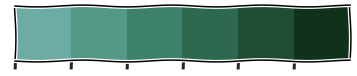

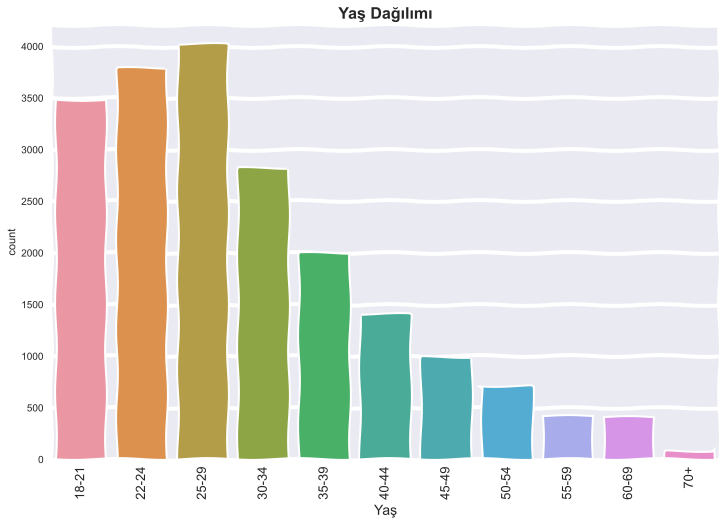

In [38]:
plt.xkcd(scale=.9,length=90,randomness=0.9)

age_data = df["Q1"].value_counts().sort_index()
custom_color = sns.palplot(sns.color_palette("ch:2,r=.2,l=.6"))
plt.figure(figsize=(12,8))
plt.style.use("seaborn")
sns.countplot(x = "Q1", data = df, palette = custom_color, order = age_data.index)
plt.title("Yaş Dağılımı", fontsize = 16, weight = "bold")
plt.xticks(rotation = 90, fontsize = 13)
plt.xlabel("Yaş", fontsize = 14)

# Making a World MAP 

In [58]:
country_df = df["Q3"].value_counts().rename_axis("country").reset_index(name = "aliden")
country_df = country_df[country_df != "Other"]
country_df.head()

,country,aliden
0,India,5851
1,United States of America,2237
2,NaN,1388
3,Brazil,694
4,Japan,638


In [66]:
from geopy.geocoders import Nominatim
import folium
from folium.plugins import MarkerCluster

geolocator = Nominatim(user_agent = "world_map")

def geolocate(country):
    try:
        loc = geolocator.geocode(country)
        return (loc.latitude, loc.longitude)
    except:
        return np.nan

country_df['country'].replace({'Iran, Islamic Republic of...' : 'Iran','Republic of Korea':'North Korea'},inplace=True)
country_df["coordinates"] = country_df["country"].apply(lambda x: geolocate(x))



In [93]:
country_df["latitude"] = [x[0] for x in country_df["coordinates"]]
country_df["longitude"] = [x[1] for x in country_df["coordinates"]]
all_users = country_df.aliden.sum()

In [94]:
world_map = folium.Map(tiles = "cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)
country_df.head()

,country,aliden,coordinates,latitude,longtitude,longitude
0,India,5851,"(22.3511148, 78.6677428)",22.351115,78.667743,78.667743
1,United States of America,2237,"(39.7837304, -100.4458825)",39.783730,-100.445882,-100.445882
2,NaN,1388,"(46.3144754, 11.0480288)",46.314475,11.048029,11.048029
3,Brazil,694,"(-10.3333333, -53.2)",-10.333333,-53.200000,-53.200000
4,Japan,638,"(36.5748441, 139.2394179)",36.574844,139.239418,139.239418


In [99]:
for i in range(len(country_df)):
        lat = country_df.iloc[i]['latitude']
        long = country_df.iloc[i]['longitude']
        radius=5
        popup_text = """
                    {}% of all Users <br>"""
        popup_text = popup_text.format('{:.2f}'.format(country_df.iloc[i]['aliden']*100/country_df.aliden.sum()))
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)
#show the map
world_map